# Beschreibung des Projekts

Unser Projekt ist eine Anwendung zur Analyse und Visualisierung von Wettervorhersagen-Daten der One Call API von OpenWeatherMap. Es besteht aus mehreren Modulen und Klassen, die spezifische Aufgaben übernehmen, um die Wetterdaten effizient zu verarbeiten und darzustellen.

## Module und Klassen

- `Singleton`: Klasse die nur einmal instanziert werden kann
- `WeatherDataFetcher` (Singleton): Abrufen von Wetterdaten von der One Call API.
- `WeatherAnalyzer`: Aufbereitung der Wetterdaten für die Visualisierung.
- `WeatherPlotter`: Visualisierung der Wetterdaten in Diagrammen.
- `LocationWeatherData`: Wetterdaten eines Orts
- `TemperatureData`: Temperaturinformationen
- `PrecipitationData`: Niederschlagsdaten
- `WindData`: Winddaten

## Workflow
1. Koordinaten eines Orts mit der `WeatherDataFetcher`-Klasse suchen (API-Anfrage).  
2. Wettervorhersagedaten dieser Koordinaten mit der `WeatherDataFetcher`-Klasse suchen (API-Anfrage) und in ein `LocationWeatherData`-Objekt umwandeln.  
3. Das `LocationWeatherData`-Objekt mit der `WeatherAnalyzer`-Klasse in ein pandas Dataframe umwandeln.  
4. Falls nötig, die DataFrames mit der `WeatherAnalyzer`-Klasse normalisieren (Datum).  
5. Diagramme anhand der Dataframes mit der `WeatherPlotter`-Klasse anzeigen.  


### Schritt 1: Projektverzeichnis zum sys.path hinzufügen

In [1]:
import sys
import os

# Eine Ebene im Verzeichnisbaum nach oben wechseln (von notebooks/ zum Wurzelverzeichnis)
sys.path.append(os.path.abspath(".."))

### Schritt 2: Klassen importieren

In [2]:
from src.analyzer import WeatherAnalyzer
from src.fetcher  import WeatherDataFetcher
from src.plotter  import WeatherPlotter

### Schritt 3: Instanzen der Klassen erstellen

In [3]:
# Instanzen der Klassen erstellen
fetcher  = WeatherDataFetcher()  # Instanz der WeatherDataFetcher-Klasse
analyzer = WeatherAnalyzer()     # Instanz der WeatherAnalyzer-Klasse
plotter  = WeatherPlotter()      # Instanz der WeatherPlotter-Klasse

### Schritt 4: Locations definieren

In [4]:
locations = [
    {"name": "Rapperswil", "state_code": "SG",  "country_code": "CH"},
    {"name": "New York",   "state_code": "NY",  "country_code": "US"},
    {"name": "Tokyo",      "state_code": "13",  "country_code": "JP"},
    {"name": "Helsinki",   "state_code": "UUS", "country_code": "FI"},
    {"name": "Singapore",  "state_code": "SG",  "country_code": "SG"},
    {"name": "Cherrapunji", "state_code": "ML", "country_code": "IN"}
]

### Schritt 5: Vorhersagedaten mit Fetcher holen, mit Analyzer aufbereiten, in einer Liste speichern und normalisieren

In [5]:
forecast_data_instances = []
forecast_dataframes = []

for location in locations:
    # Verwenden Sie den Fetcher, um die Koordinaten für den Standort abzurufen
    coordinates = fetcher.get_coordinates_by_location(location.values())

    if coordinates:
        # Wenn die Koordinaten erfolgreich abgerufen wurden, holen Sie die Wettervorhersage
        location_weather_data = fetcher.get_weather_forecast_data_by_coordinates(location["name"], coordinates[0], coordinates[1])

        if location_weather_data:
            # Wenn die Wettervorhersage erfolgreich abgerufen wurde, erstellen Sie ein DataFrame
            forecast_dataframe = analyzer.create_forecast_dataframe(location_weather_data)

            # Speichern Sie die LocationWeatherData-Instanz und das entsprechende DataFrame in einer Liste
            forecast_data_instances.append(location_weather_data)
            forecast_dataframes.append(forecast_dataframe)
        else:
            # Behandeln Sie den Fall, in dem die Wettervorhersage nicht abgerufen werden konnte
            print(f"Wettervorhersagedaten für {location} konnten nicht abgerufen werden.")
            continue
    else:
        # Behandeln Sie den Fall, in dem die Koordinaten nicht abgerufen werden konnten
        print(f"Koordinaten für {location} konnten nicht abgerufen werden.")
        continue

# Normalisieren Sie die Datumswerte der DataFrames
normalized_dataframes = analyzer.normalize_dataframes_on_date(forecast_dataframes)

### Schritt 6: Daten mit Plotter visualieren

Temperaturen für Rapperswil:
         date  temp_morning  temp_day  temp_evening  temp_night  temp_min  temp_max  temp_avg  rain  snow  probability  wind_speed  wind_degrees
0  09.05.2025          8.73     14.11         13.59       11.82      7.98     14.48   12.0625  0.68     0         0.90        3.04            45
1  10.05.2025          6.91     19.50         18.06       10.42      5.47     20.87   13.7225  0.26     0         0.37        3.28            13
2  11.05.2025          8.82     20.73         17.53       10.96      7.50     21.50   14.5100  2.23     0         0.82        3.57            12
3  12.05.2025          8.93     16.21         13.98        8.82      7.78     16.84   11.9850  0.00     0         0.03        2.06            35
4  13.05.2025          8.68     18.44         13.41        7.48      5.30     18.44   12.0025  0.00     0         0.00        5.34            31
5  14.05.2025          9.27     19.71         14.71        8.48      4.97     19.97   13.0425  0.00  

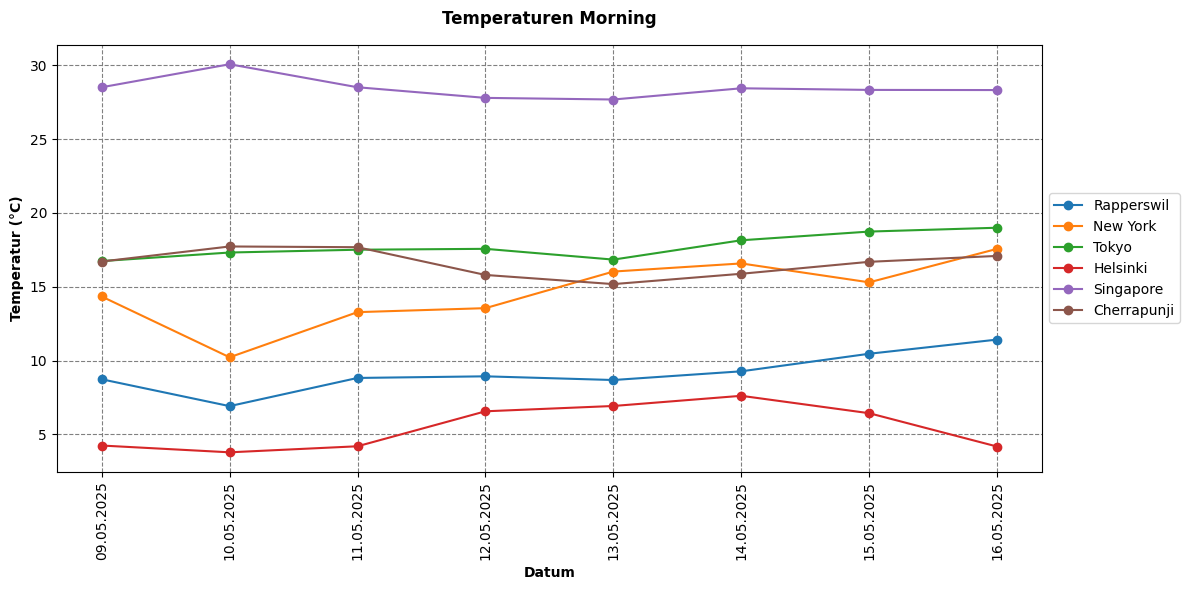

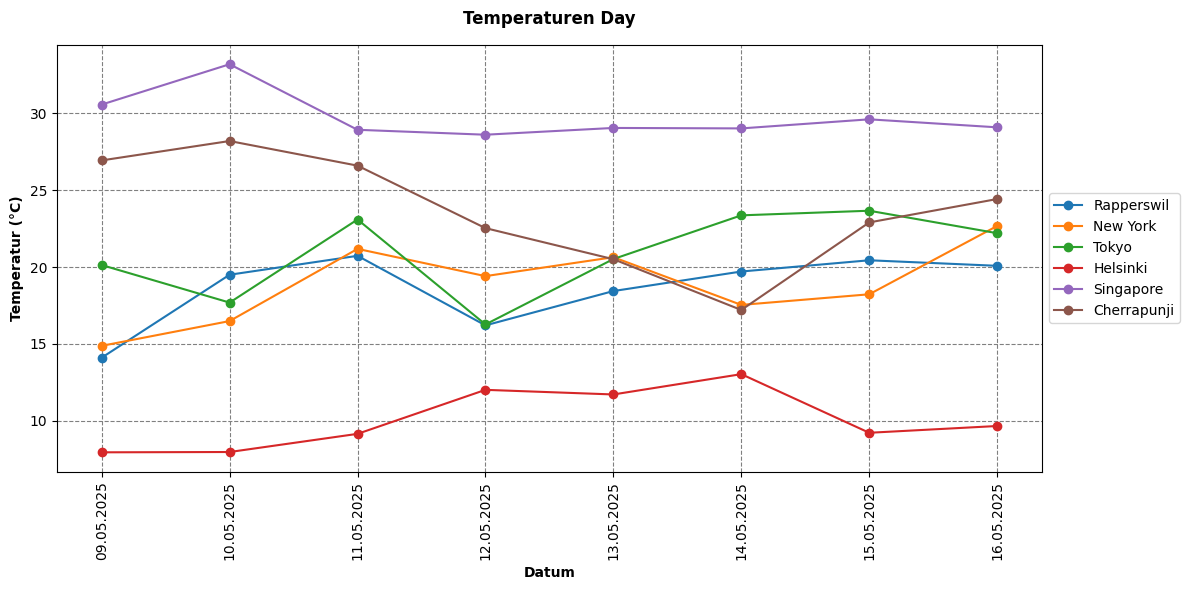

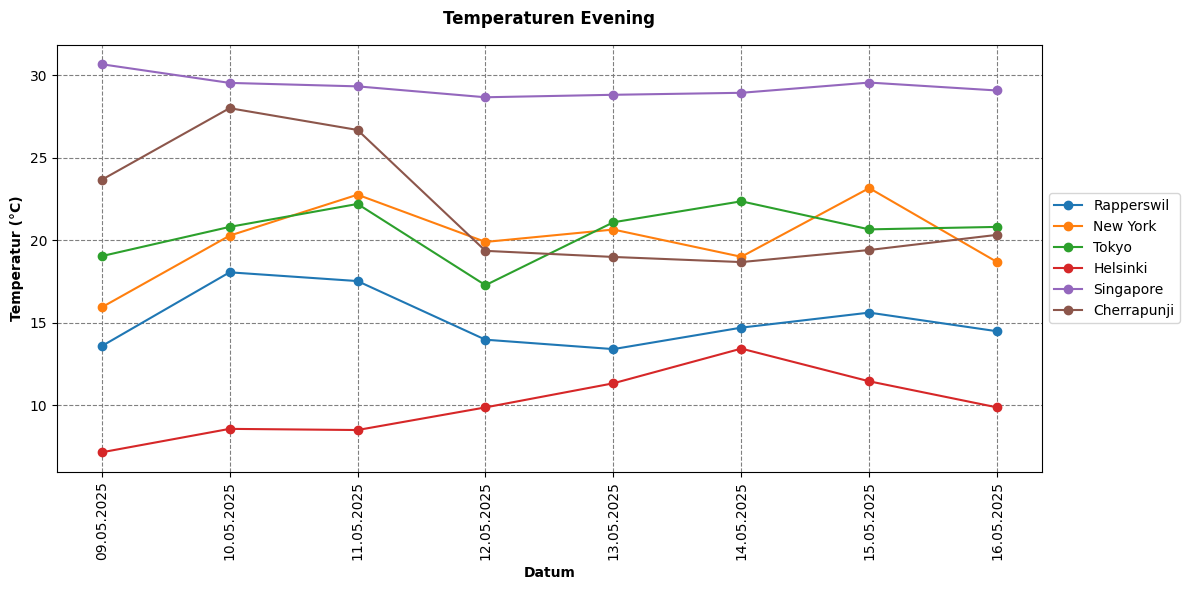

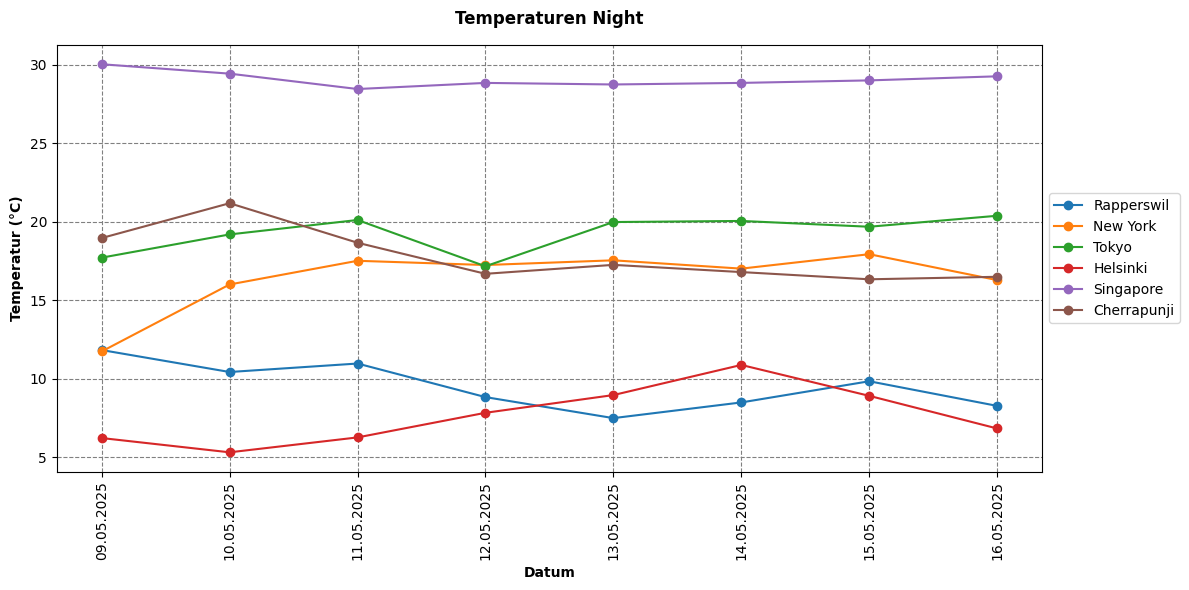

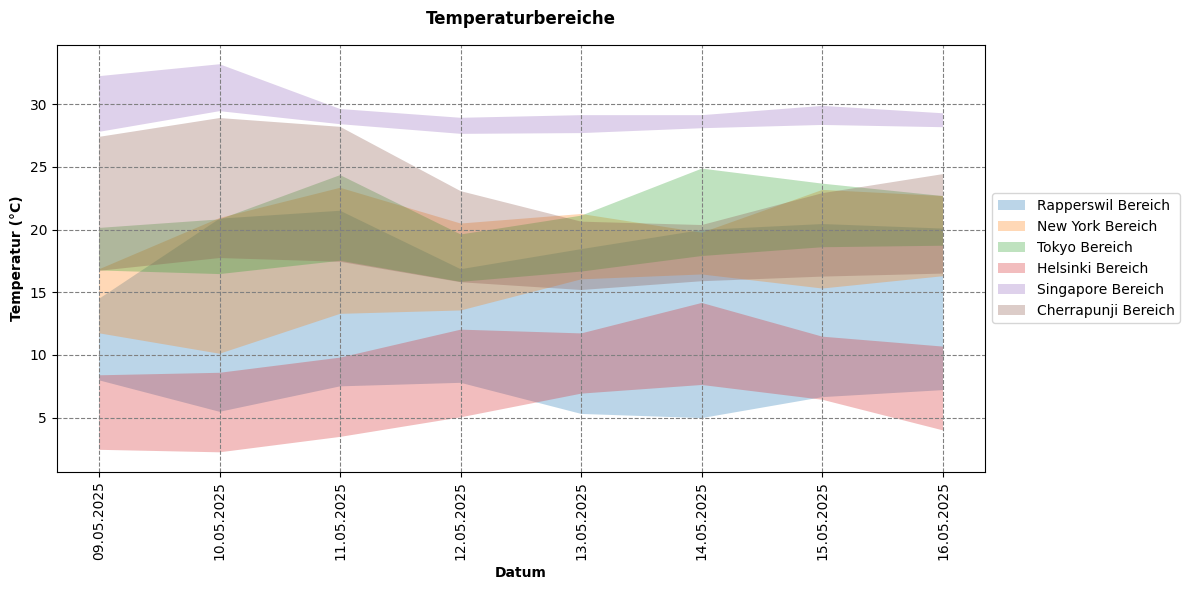

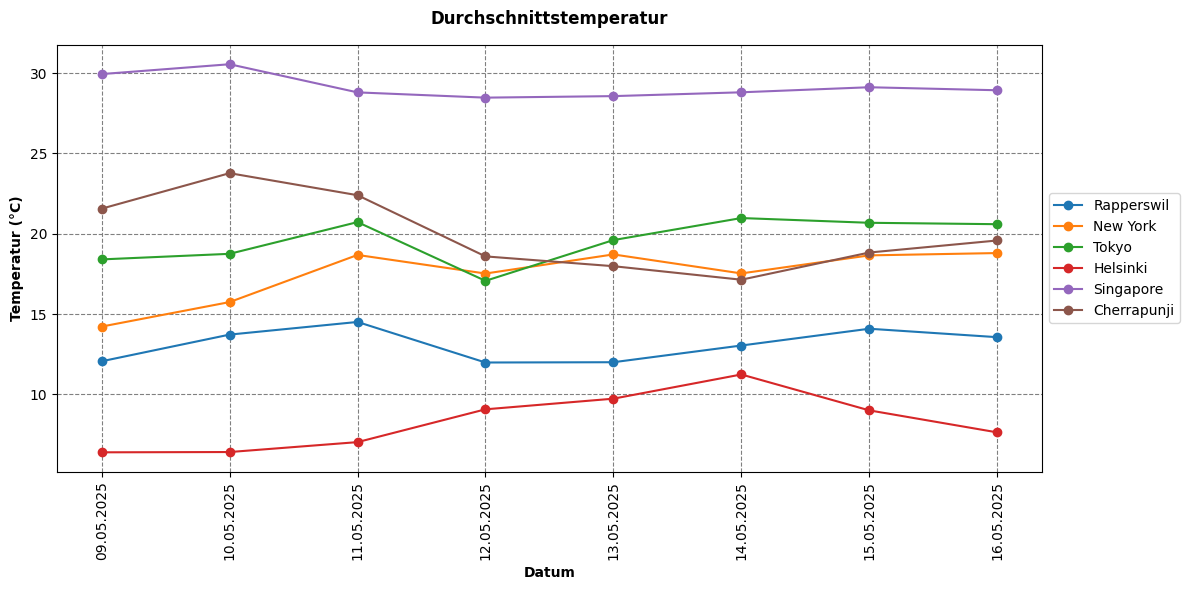

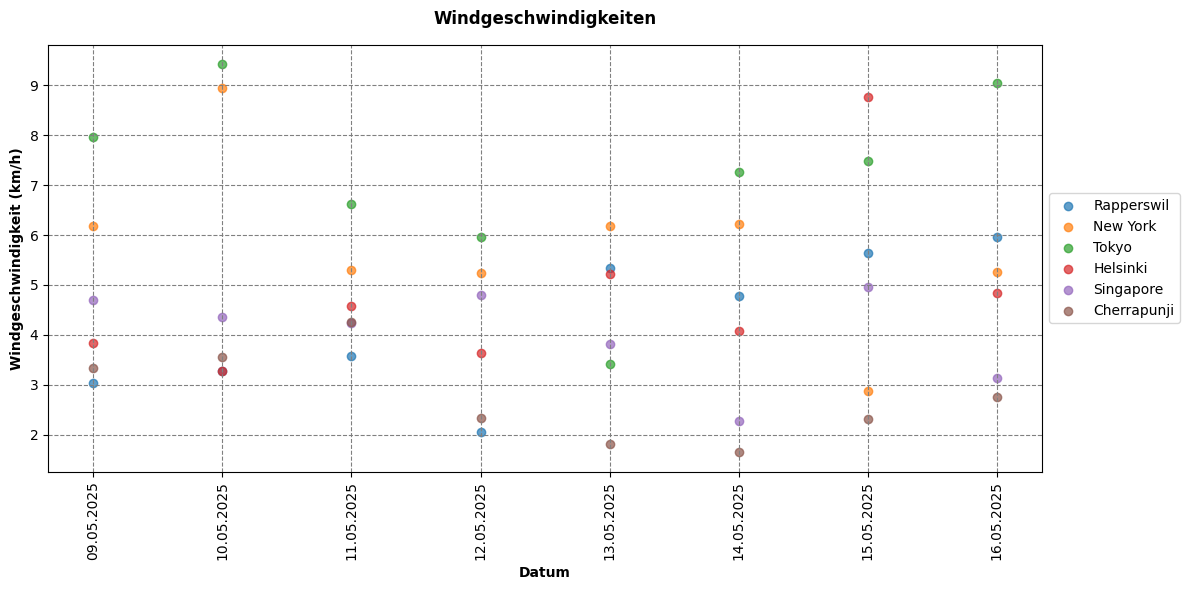

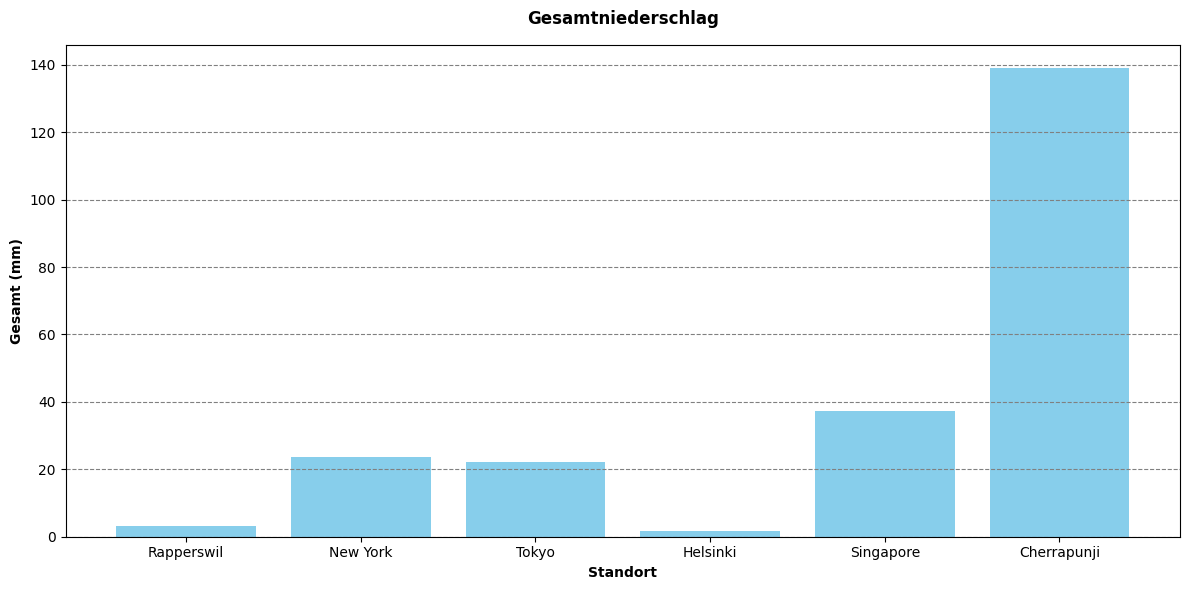

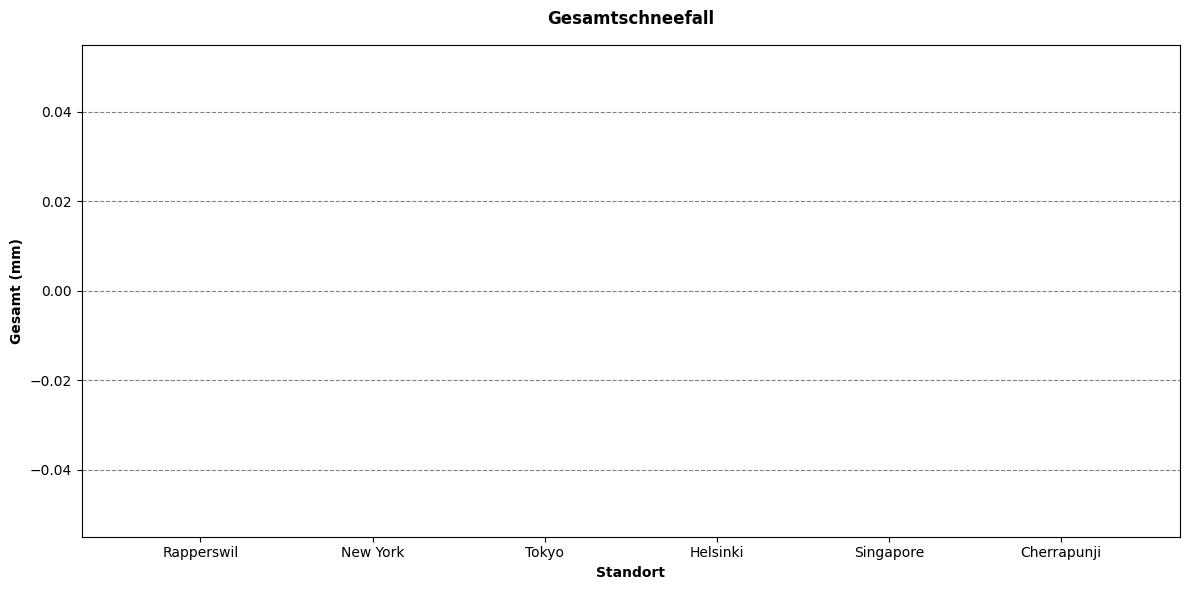

In [6]:
# Erstellen Sie ein Dictionary, um die Wetterdaten für jeden Standort zu speichern
location_data = {}

# Iterieren Sie über die Liste der Wetterdaten-Instanzen und normalisierten DataFrames
for i in range(len(forecast_data_instances)):
    location_name = locations[i]["name"]  # Standortname abrufen
    location_data[location_name] = normalized_dataframes[i]  # Standortname mit seinem DataFrame verknüpfen

# Wetterdaten für jeden Standort ausgeben
for location in location_data:
    print("=" * 40)
    print(f"Temperaturen für {location}:")  # Standortname ausgeben
    print("=" * 40)
    print(location_data[location].to_string())  # DataFrame als String ausgeben

# Temperaturen zu verschiedenen Tageszeiten plotten
plotter.plot_temperatures_by_time_of_day(location_data, "morning")
plotter.plot_temperatures_by_time_of_day(location_data, "day")    
plotter.plot_temperatures_by_time_of_day(location_data, "evening")
plotter.plot_temperatures_by_time_of_day(location_data, "night")  

# Minimale und maximale Temperaturen plotten
plotter.plot_min_max_temperatures(location_data)

# Durchschnittstemperaturen plotten
plotter.plot_avg_temperatures(location_data)

# Windgeschwindigkeit plotten
plotter.plot_wind_speed(location_data)

# Gesamtniederschlag plotten
plotter.plot_total_rain(location_data)

# Gesamtschneemenge plotten
plotter.plot_total_snow(location_data)
